## Algerian Forest Fires Dataset 

### Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- 122 instances for each region
- The period from June 2012 to September 2012.
- The dataset includes 12 attribues

### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

### Problem Statement for this notebook:

EDA and selection of features for linear regression ML models, with FWI as the target column.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            244 non-null    int64  
 1   month          244 non-null    int64  
 2   year           244 non-null    int64  
 3   Temperature    244 non-null    int64  
 4   RH             244 non-null    int64  
 5   Ws             244 non-null    int64  
 6   Rain           244 non-null    float64
 7   FFMC           244 non-null    float64
 8   DMC            244 non-null    float64
 9   DC             244 non-null    float64
 10  ISI            244 non-null    float64
 11  BUI            244 non-null    float64
 12  FWI            244 non-null    float64
 13  Region_Bejaia  244 non-null    int64  
 14  Fire           244 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.7 KB


In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region_Bejaia,Fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


# Exploratory Data Anaylysis - Entire data set

### Doing some analysis of time-based columns and "fire" column, before dropping them

In [13]:
percentage = df['Fire'].value_counts()
percentage

Fire
1    138
0    106
Name: count, dtype: int64

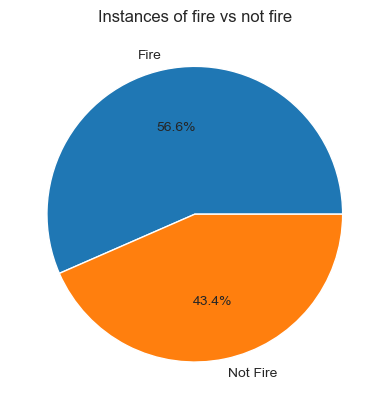

In [14]:
labels = ["Fire", "Not Fire"]
plt.pie(percentage, labels=labels, autopct='%1.1f%%')
plt.title("Instances of fire vs not fire")
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_6740\165486033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp['Fire'] = df['Fire'].astype(str)


Text(0.5, 1.0, 'Fire Analysis of Bejaia Regions')

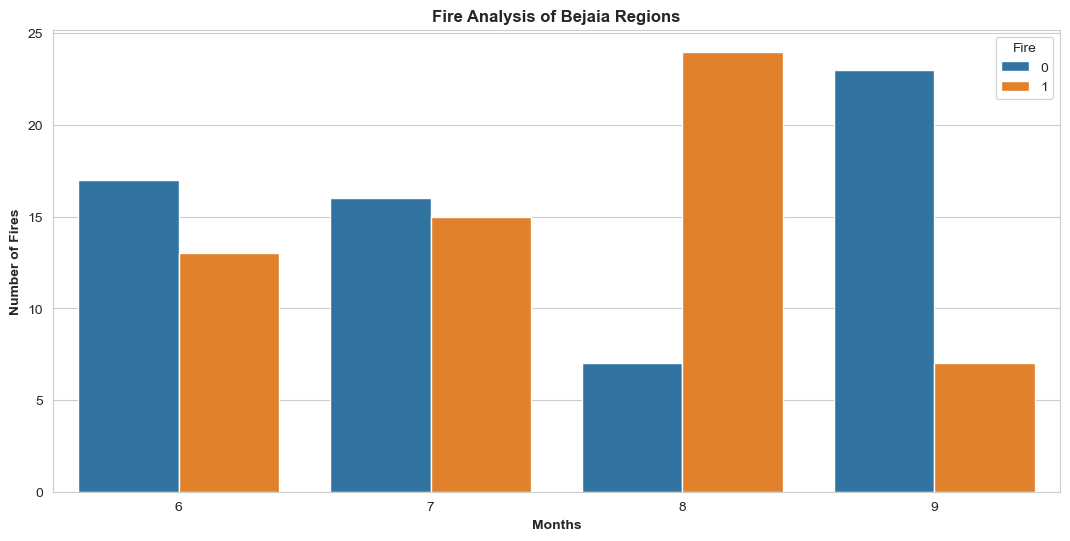

In [15]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region_Bejaia']==1]
dftemp['Fire'] = df['Fire'].astype(str)
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Fire',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Bejaia Regions",weight='bold')

C:\Users\shiva\AppData\Local\Temp\ipykernel_6740\247797401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp['Fire'] = df['Fire'].astype(str)


Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regions')

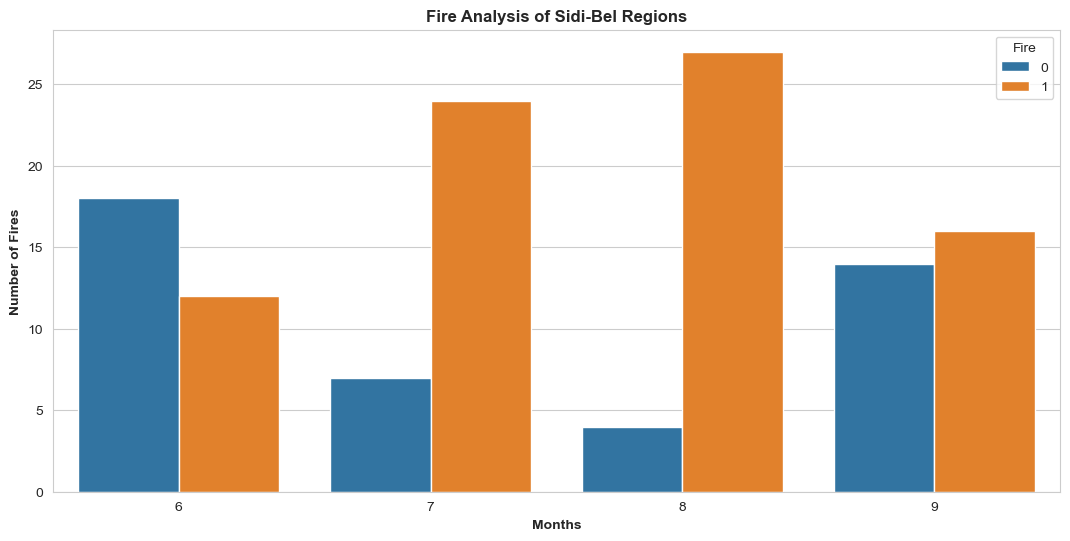

In [16]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region_Bejaia']==0]
dftemp['Fire'] = df['Fire'].astype(str)
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Fire',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions",weight='bold')

# Exploratory Data Anaylysis - Without time-based and "fire" columns

Since, time-based data is not needed, drop them. "Fire" column is also not needed.

In [17]:
df = df.drop(["day", "month", "year", "Fire"], axis=1)

In [18]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region_Bejaia
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [19]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region_Bejaia
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,-0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.081489
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,-0.266298
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,-0.087996
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000,-0.198474


<Axes: >

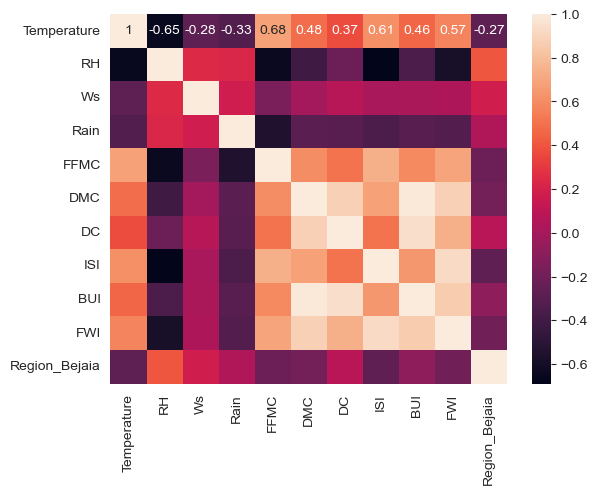

In [20]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

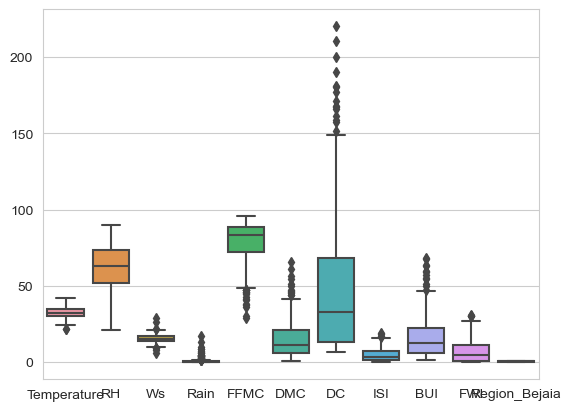

In [21]:
sns.boxplot(df)

In [22]:
# function to find columns with corr more than a certain value.
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features=correlation(df,0.90)
corr_features

{'BUI', 'FWI'}

From the above information
- "BUI" is highly correlated to "DMC"
- "FWI" is highly correlated to "ISI"

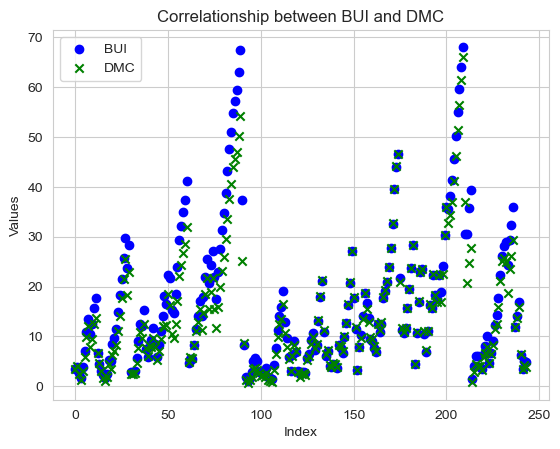

In [24]:
plt.scatter(df.index, df["BUI"], marker="o", c="blue", label="BUI")
plt.scatter(df.index, df["DMC"], marker="x", c="green" ,label="DMC")
plt.xlabel('Index')
plt.ylabel('Values')
plt.title("Correlationship between BUI and DMC")
plt.legend()
plt.show()

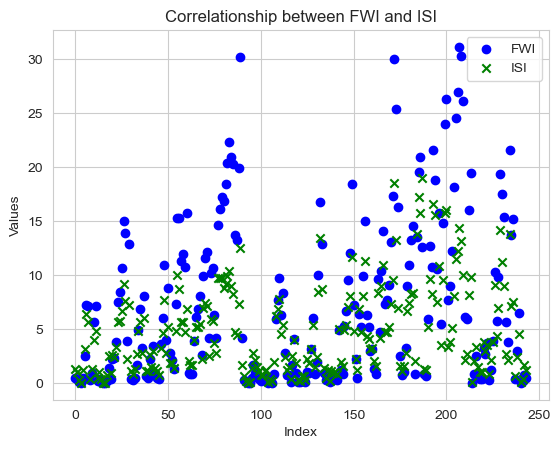

In [25]:
plt.scatter(df.index, df["FWI"], marker="o", c="blue", label="FWI")
plt.scatter(df.index, df["ISI"], marker="x", c="green" ,label="ISI")
plt.xlabel('Index')
plt.ylabel('Values')
plt.title("Correlationship between FWI and ISI")
plt.legend()
plt.show()

### Observations:
- Forest fires occur the most in the months of July and August
- The dataset is balanced with 43.6% "not fire" and the rest as "fire"
- BUI and DMC are highly correlated, hence one of the columns can be dropped, depending on further discussion with the domain expert
- FWI has a scaled-up relationship with ISI, hence one of the columns can be dropped, depending on further discussion with the domain expert

In [26]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region_Bejaia
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


In [27]:
df.to_csv('Algerian_forest_fires_dataset_full.csv', index=False)